In [56]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [30]:
#Leer el archivo con los datos y cargarlos en las variables
cells=[]
with open('./data/m4.csv') as f:
    for line in f:
        cells.append(int(line))
print(cells)

[0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 61, 0, -1000, 0, 0, 0, 0, 0, 0, 0, 0, -1000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, -22, -1000, -41, 0, -39, 0, 41, 0, -41, 0, 41, -48, 0, 0, 0, -42, 0, 0, 34, -1000, -32, 0, 21, 0, 0, -33, 0, -1000, 0, -72, 0, 0, 0, 0, 0, 0, 1000, 0, 0, -64, 0, 0, -1000, 0, 0, 0, 0, 0, -41, 0, 0, -71, 0, 0, -70, 0, 1000]


Se encontrará una política óptima utilizando Iteración de valor. Se utilizará un factor de descuento de 0.9

In [31]:
def calcVsInit():
    vs=np.zeros(len(cells))
    for i in range(len(cells)):
        if abs(cells[i])==1000:
            vs[i]=cells[i]
    print(vs)
    return vs

In [70]:
vs=calcVsInit()
d=1
diceProbability=1/6
discountFactor=0.9
while d>0.00001:
    d=0
    for i in range(len(vs)):
        if abs(vs[i])==1000:
            continue
        v=vs[i]
        if abs(cells[i])!=1000 and cells[i]!=0:
            updateValue=vs[i+cells[i]]
            vs[i]=updateValue
            d=max(d,abs(updateValue-v))
            continue
        valueOfRight=0
        for j in range(1,7):
            newPosition=i+j
            if newPosition>len(vs)-1:
                newPosition=2*len(vs)-newPosition-1
            if abs(cells[newPosition])!=1000 and cells[newPosition]!=0:
                valueOfRight+=diceProbability*(discountFactor*vs[newPosition+cells[newPosition]]-1)
            else:
                valueOfRight+=diceProbability*(discountFactor*vs[newPosition]-1)
        valueOfLeft=0
        for j in range(1,7):
            newPosition=i-j
            if newPosition<0:
                newPosition=abs(i-j)-1
            if abs(cells[newPosition])!=1000 and cells[newPosition]!=0:
                valueOfLeft+=diceProbability*(discountFactor*vs[newPosition+cells[newPosition]]-1)
            else:
                valueOfLeft+=diceProbability*(discountFactor*vs[newPosition]-1)
        updateValue=max(valueOfLeft,valueOfRight)
        vs[i]=updateValue
        d=max(d,abs(updateValue-v))
    print(d)
print(vs)

pi=np.zeros(len(vs))

for i in range(len(vs)):
    if abs(vs[i])==1000:
        continue
    valueOfRight=0
    for j in range(1,7):
        newPosition=i+j
        if newPosition>len(vs)-1:
            newPosition=2*len(vs)-newPosition-1
        if abs(cells[newPosition])!=1000 and cells[newPosition]!=0:
            valueOfRight+=diceProbability*(discountFactor*vs[newPosition+cells[newPosition]]-1)
        else:
            valueOfRight+=diceProbability*(discountFactor*vs[newPosition]-1)
    valueOfLeft=0
    for j in range(1,7):
        newPosition=i-j
        if newPosition<0:
            newPosition=abs(i-j)-1
        if abs(cells[newPosition])!=1000 and cells[newPosition]!=0:
            valueOfLeft+=diceProbability*(discountFactor*vs[newPosition+cells[newPosition]]-1)
        else:
            valueOfLeft+=diceProbability*(discountFactor*vs[newPosition]-1)
    if(valueOfLeft>valueOfRight):
        pi[i]=-1
    else:
        pi[i]=1
print(pi)

[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0. -1000.     0.     0.     0.     0.     0.     0.     0.
     0. -1000.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0. -1000.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0. -1000.     0.     0.     0.     0.     0.     0.     0.
 -1000.     0.     0.     0.     0.     0.     0.     0.     0.  1000.
     0.     0.     0.     0.     0. -1000.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.  1000.]
1000.0
277.34248184375
136.9274625
70.41725175950032
36.408893251526706
19.694678831665442
15.516503196192495
12.56133777442976
10.767813619137055
8.8885361058942
7.066869082433264
5.520117174079068
4.2717260216378605
3.288267886190731
2.5234787624185557
1.9330663841464713
1.4792006480033

In [33]:
def calcQsInit():
    vsT=np.zeros(len(cells),2)
    for i in range(len(cells)):
        if abs(cells[i])==1000:
            vsT[i]=cells[i]
    print(vsT)
    return vsT

[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0. -1000.     0.     0.     0.     0.     0.     0.     0.
     0. -1000.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0. -1000.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0. -1000.     0.     0.     0.     0.     0.     0.     0.
 -1000.     0.     0.     0.     0.     0.     0.     0.     0.  1000.
     0.     0.     0.     0.     0. -1000.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.  1000.]
[[1000.          717.70963106]
 [ 899.          658.13585783]
 [ 829.41068722  609.56206421]
 [ 767.3872376   582.13701259]
 [ 789.12262497  553.61907555]
 [ 781.07198961  452.83775459]
 [ 784.91463313  333.1726123 ]
 [  28.43012085 -151.05656623]
 [ 637.89998062  429.15267741]
 [ 475.818

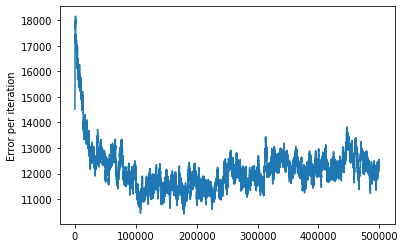

179030


In [94]:
vs2=calcVsInit()
qs2=np.zeros((len(cells),2))
pi2=np.full((len(cells),2),0.5)
alpha=0.1
discountFactor=0.9
epsilon=0.5
numIter=500000
errors=[]
pis=[]
for i in range(numIter):
    s=0
    while True:
        randomValue=random.random()
        if randomValue<pi2[s][0]:
            curA=0
        else:
            curA=1
        j=int((curA-0.5)*2*random.randrange(1, 7))
        newS=int(s+j)
        if newS>len(cells)-1:
            newS=2*len(cells)-newS-1
        if newS<0:
            newS=abs(newS-j)-1
        if abs(cells[newS])!=1000 and cells[newS]!=0:
            qs2[newS]= qs2[newS+cells[newS]]
            vs2[newS]= vs2[newS+cells[newS]]
            newS+=cells[newS]
        reward=-1
        if abs(cells[newS])==1000:
            reward=cells[newS
        maxA=max(qs2[newS][0],qs2[newS][1])
        qs2[s][curA]= qs2[s][curA] + alpha*(reward + discountFactor*maxA - qs2[s][curA])
        vs2[s]=qs2[s][0]*pi2[s][0]+qs2[s][1]*pi2[s][1]
        if abs(cells[newS])==1000:
            break
        a=np.argmax(qs2[s])
        pi2[s][a]=1-epsilon+epsilon/len(qs2[s])
        pi2[s][1-a]=epsilon/len(qs2[s])
        s=newS
    errorsT=0
    for j in range(len(pi2)):
        if cells[j]==0:
             errorsT+=abs(vs[j]-vs2[j])
    errors.append(errorsT)
    pis.append(pi)    
print(qs2)
print(pi2)
print(list(map(lambda x: ('{:.7f}'.format(x)) , vs2)))
plt.plot(errors)
plt.ylabel('Error per iteration')
plt.show()
minErrorsIndex=np.argmin(errors)
print(minErrorsIndex)

In [95]:
bestPi=pis[minErrorsIndex]
wins=np.zeros((len(cells),2))
for i in range(10000):
    s=0
    chain=[0]
    hasWon=False
    while True:
        randomValue=random.random()
        if randomValue<bestPi[s][0]:
            curA=0
        else:
            curA=1
        j=int((curA-0.5)*2*random.randrange(1, 7))
        newS=int(s+j)
        if newS>len(cells)-1:
            newS=2*len(cells)-newS-1
        if newS<0:
            newS=abs(newS-j)-1
        if abs(cells[newS])!=1000 and cells[newS]!=0:
            qs2[newS]= qs2[newS+cells[newS]]
            vs2[newS]= vs2[newS+cells[newS]]
            newS+=cells[newS]
        if abs(cells[newS])==1000:
            if cells[newS]==1000:
                hasWon=True
            break
        s=newS
        chain.append(s)
    for i in chain:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-95-ca3404cbf4ff>, line 3)